# Importing required Libraries and Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
%matplotlib inline

In [2]:
from scipy.stats import norm
from scipy import stats
from subprocess import check_output
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold


# Importing the Auto MPG Dataset

In [3]:
df=pd.read_csv(r'c:\Users\Sony\Desktop\Auto-Mpg.csv',index_col='car name')

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


We have imported all the packages and libraries we will be using for the initial exploration of data. This notebook will be split into two major sections, majorly:

Exploration and Visualization using pandas and seaborn packages
Building evaluating and tuning different regression models using scikit learn package

# Part 1: Data Exploration

In [5]:
#checking number of rows and columns
df.shape

(398, 8)

398 rows and 8 columns

In [6]:
#checking the datatypes of each variable

df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

So there it is..lots of numbers. We can see that the dataset has the following columns (with their type):

mpg: continuous

cylinders: multi-valued discrete

displacement: continuous

horsepower: continuous

weight: continuous

acceleration: continuous

model year: multi-valued discrete

origin: multi-valued discrete

car name: string (unique for each instance)

# 1.1 Missing Values Detection

In [7]:
df.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
dtype: bool

Nothing seems to be missing

In [8]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

But then, why is horsepower an object and not a float, the values we saw above were clearly numbers Lets try converting the column using astype()

Let's look at the unique elements of horsepower to look for discrepancies

In [9]:
df.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

When we print out all the unique values in horsepower, we find that there is '?' which was used as a placeholder for missing values. Lest remove these entries.



In [10]:
df=df[df.horsepower != '?']

In [11]:
print('?' in df.horsepower)

False


df.shape

In [12]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

So we see all entries with '?' as place holder for data are removed. However, we the horsepower data is still an object type and not float. That is because pandas coerced the entire column as object when we imported the data set due to '?', so lest change that data

In [13]:
df.horsepower=df.horsepower.astype('float')
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

Now everything looks in order so lets continue, let's describe the dataset

# 1.2 Statistical Summary of Dataset

In [14]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [15]:
df.mpg.describe()

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

So the minimum value is 9 and maximum is 46, but on average it is 23.44 with a variation of 7.8

# ''Skewness of Mpg column''

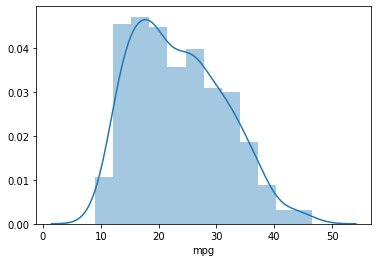

In [16]:
sns.distplot(df['mpg'])

In [17]:
print ('skewness: %f'  %df['mpg'].skew())
print ('kurtosis: %f'  %df['mpg'].kurt())

skewness: 0.457092
kurtosis: -0.515993


Using our seaborn tool we can look at mpg:

Slight of 0,.45

Kurtosis of -0.51

# Univariate and Bivariate Analysis using Data Visualization

# "we need to SCALE them to same the same range of [0,1]"

In [18]:
def scale(a):
    b=(a-a.min())/(a.max()-a.min())
    return b

In [19]:
df_scale=df.copy()

In [20]:
df_scale['displacement']=scale(df_scale['displacement'])
df_scale['acceleration']=scale(df_scale['acceleration'])
df_scale['horsepower']=scale(df_scale['horsepower'])
df_scale['weight']=scale(df_scale['weight'])
df_scale['mpg']=scale(df_scale['mpg'])

In [21]:
df_scale.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
chevrolet chevelle malibu,0.239362,8,0.617571,0.456522,0.536150,0.238095,70,1
buick skylark 320,0.159574,8,0.728682,0.646739,0.589736,0.208333,70,1
plymouth satellite,0.239362,8,0.645995,0.565217,0.516870,0.178571,70,1
amc rebel sst,0.186170,8,0.609819,0.565217,0.516019,0.238095,70,1
ford torino,0.212766,8,0.604651,0.510870,0.520556,0.148810,70,1


All our data is now scaled to the same range of [0,1]. This will help us visualize data better. We used a copy of the original data-set for this as we will use the data-set later when we build regression models.

In [22]:
df_scale['origin'].unique()

array([1, 3, 2], dtype=int64)

In [23]:
df['country_code']=df.origin.replace([1,2,3],['USA','Europe','Japan'])
df_scale['country_code']=df_scale.origin.replace([1,2,3],['USA','Europe','Japan'])

In [24]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,country_code
car name,,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,USA
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,USA
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,USA
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,USA
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,USA


In [25]:
df_scale.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,country_code
car name,,,,,,,,,
chevrolet chevelle malibu,0.239362,8,0.617571,0.456522,0.536150,0.238095,70,1,USA
buick skylark 320,0.159574,8,0.728682,0.646739,0.589736,0.208333,70,1,USA
plymouth satellite,0.239362,8,0.645995,0.565217,0.516870,0.178571,70,1,USA
amc rebel sst,0.186170,8,0.609819,0.565217,0.516019,0.238095,70,1,USA
ford torino,0.212766,8,0.604651,0.510870,0.520556,0.148810,70,1,USA


Lets look at MPG's relation to categories

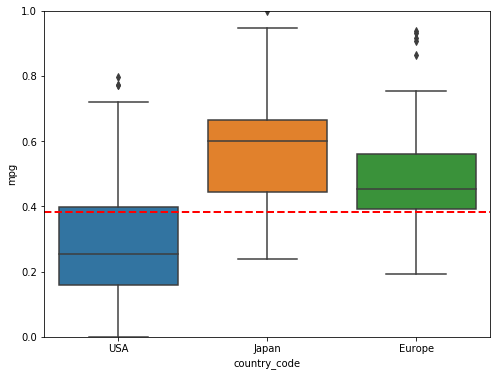

In [26]:
var='country_code'
df_plt=pd.concat([df_scale['mpg'],df_scale[var]], axis=1)
f,ax=plt.subplots(figsize=(8,6))
fig=sns.boxplot(x=var,y="mpg",data=df_plt)
fig.axis(ymin=0,ymax=1)
fig.axhline(df_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

The red line marks the average of the set. From the above plot we can observe:


Majority of the cars from USA (almost 75%) have MPG below global average.

Majority of the cars from Japan and Europe have MPG above global average.

Let's look at the year wise distribution of MPG

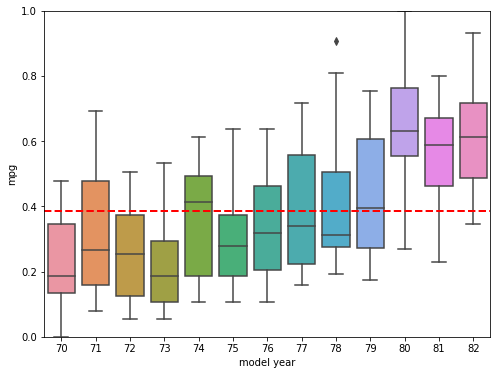

In [27]:
var='model year'
df_plt=pd.concat([df_scale['mpg'],df[var]],axis=1)
f,ax=plt.subplots(figsize=(8,6))
fig=sns.boxplot(x=var,y='mpg',data=df_plt)
fig.axis(ymin=0,ymax=1)
fig.axhline(df_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

And MPG distribution for cylinders

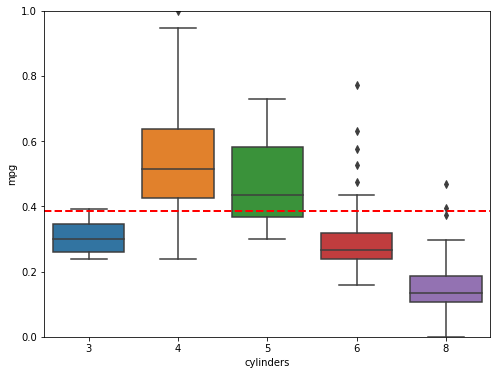

In [28]:
var = 'cylinders'
df_plt = pd.concat([df_scale['mpg'], df_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=df_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(df_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

# Lets check Correlation Matrix

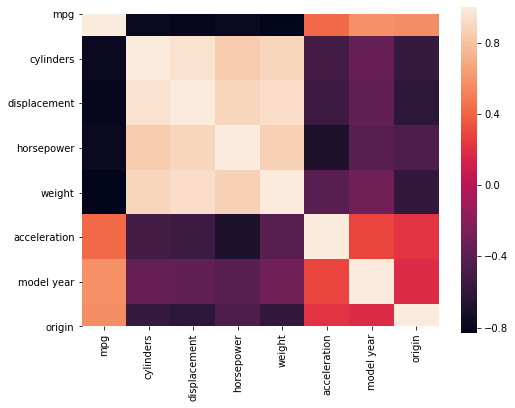

In [29]:
corrmat=df.corr()
f,ax=plt.subplots(figsize=(8,6))
sns.heatmap(corrmat,square=True);

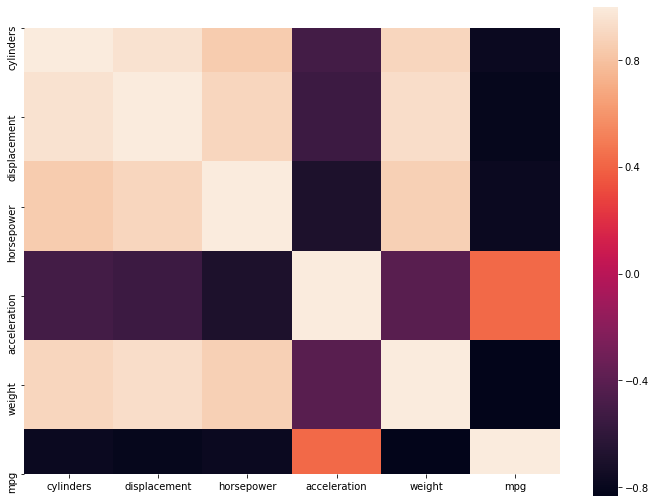

In [30]:
factors = ['cylinders','displacement','horsepower','acceleration','weight','mpg']
corrmat = df[factors].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

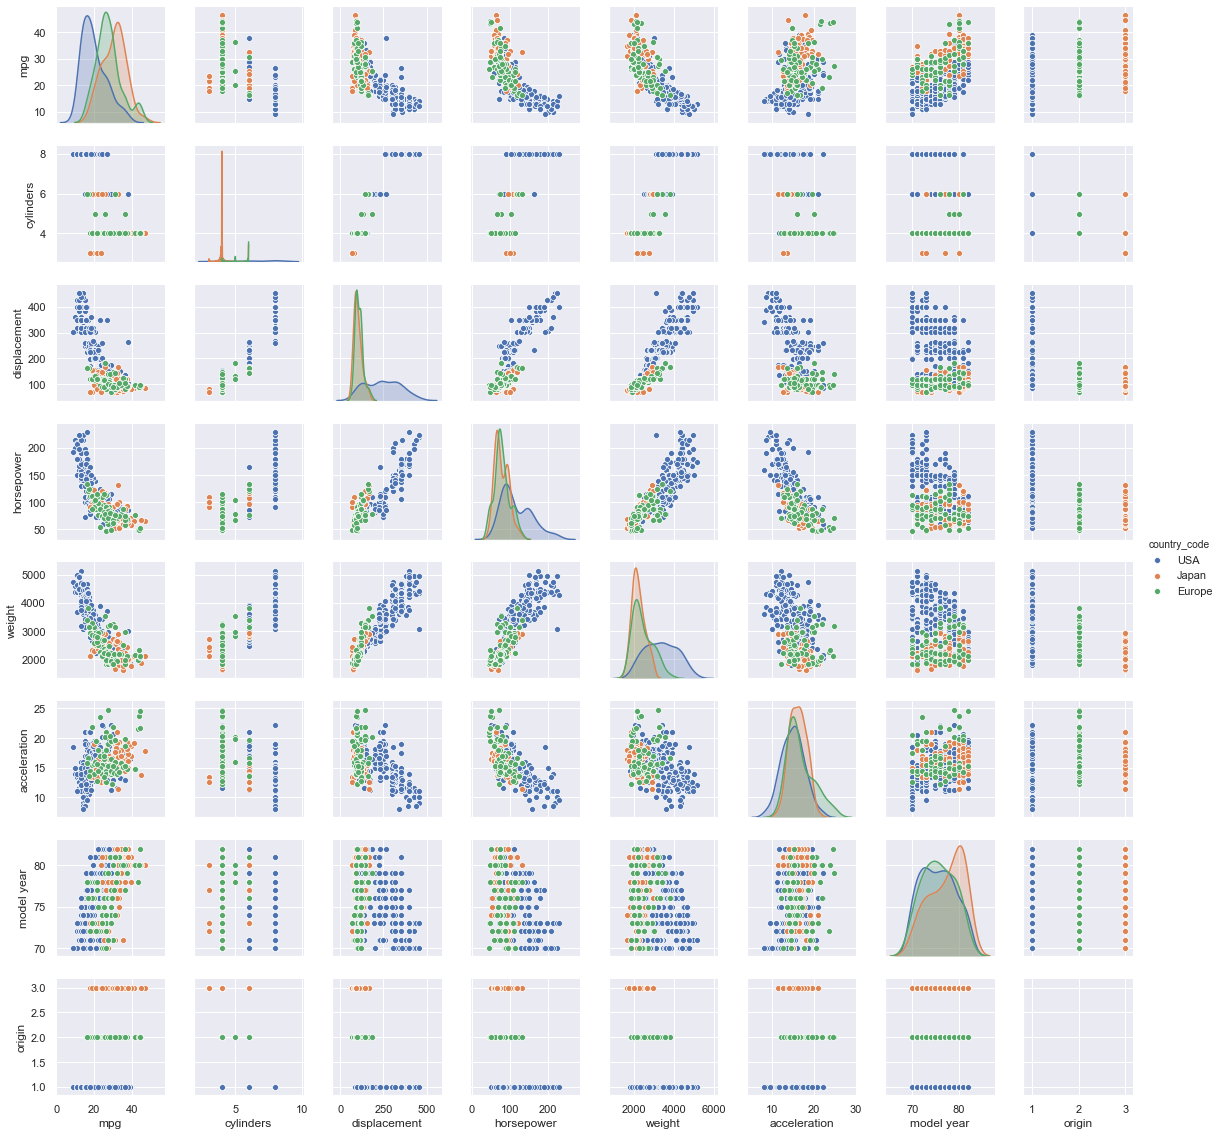

In [31]:
#scatterplot
sns.set()
sns.pairplot(df, size = 2.0,hue ='country_code')
plt.show()

So far we have seen the data
So far, we have seen the data to get a feel for it, we saw the spread of the desired variable MPG along the various discrete variables, namely, Origin, Year of Manufacturing or Model and Cylinders.
Now lets extract an additional discrete variable company name and add it to this data. We will use regular expressions and str.extract() function of pandas data-frame to make this new column

In [32]:
df.index

Index(['chevrolet chevelle malibu', 'buick skylark 320', 'plymouth satellite',
       'amc rebel sst', 'ford torino', 'ford galaxie 500', 'chevrolet impala',
       'plymouth fury iii', 'pontiac catalina', 'amc ambassador dpl',
       ...
       'chrysler lebaron medallion', 'ford granada l', 'toyota celica gt',
       'dodge charger 2.2', 'chevrolet camaro', 'ford mustang gl', 'vw pickup',
       'dodge rampage', 'ford ranger', 'chevy s-10'],
      dtype='object', name='car name', length=392)

# """As we can see the index of the data frame contains model name along with the company name. Now lets use regular expressions to quickly extract the company names. As we can see the index is in format 'COMPANY_NAME - SPACE -MODEL - SPACE -VARIANT' and so regular expressions will make it an easy task."""

That does it, almost, we can see NaN so some text was not extracted, this may be due to difference in formatting. We ca also see that some companies are named differently and also some spelling mistakes, lets correct these.

In [33]:
df[df.index.str.contains('subaru')].index.str.replace('(.*)', 'subaru dl')

Index(['subaru dlsubaru dl', 'subaru dlsubaru dl', 'subaru dlsubaru dl',
       'subaru dlsubaru dl'],
      dtype='object', name='car name')

In [34]:
df['Company_Name'] = df.index.str.extract('(^.*?)\s')

In [35]:
df['Company_Name'] = df['Company_Name'].replace(['volkswagen','vokswagen','vw'],'VW')
df['Company_Name'] = df['Company_Name'].replace('maxda','mazda')
df['Company_Name'] = df['Company_Name'].replace('toyouta','toyota')
df['Company_Name'] = df['Company_Name'].replace('mercedes','mercedes-benz')
df['Company_Name'] = df['Company_Name'].replace('nissan','datsun')
df['Company_Name'] = df['Company_Name'].replace('capri','ford')
df['Company_Name'] = df['Company_Name'].replace(['chevroelt','chevy'],'chevrolet')
df['Company_Name'].fillna(value = 'subaru',inplace=True)

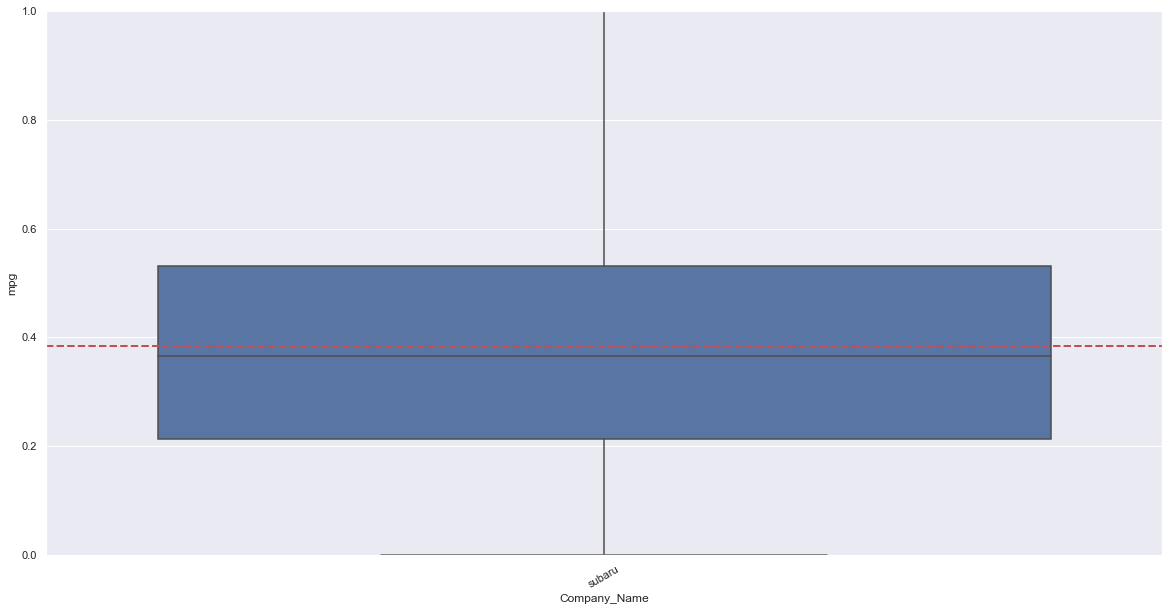

In [36]:
var = 'Company_Name'
df_plt = pd.concat([df_scale['mpg'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(20,10))
fig = sns.boxplot(x=var, y="mpg", data=df_plt)
fig.set_xticklabels(ax.get_xticklabels(),rotation=30)
fig.axis(ymin=0, ymax=1)
plt.axhline(df_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

In [37]:
df.Company_Name.isnull().any()

False

# Lets look at some extremes

In [38]:
var='mpg'
df[df[var]== df[var].min()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,country_code,Company_Name
car name,,,,,,,,,,
hi 1200d,9.0,8,304.0,193.0,4732,18.5,70,1,USA,subaru


In [39]:
df[df[var]== df[var].max()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,country_code,Company_Name
car name,,,,,,,,,,
mazda glc,46.6,4,86.0,65.0,2110,17.9,80,3,Japan,subaru


In [40]:
var='displacement'
df[df[var]== df[var].min()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,country_code,Company_Name
car name,,,,,,,,,,
fiat 128,29.0,4,68.0,49.0,1867,19.5,73,2,Europe,subaru


In [41]:
df[df[var]== df[var].max()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,country_code,Company_Name
car name,,,,,,,,,,
pontiac catalina,14.0,8,455.0,225.0,4425,10.0,70,1,USA,subaru
buick estate wagon (sw),14.0,8,455.0,225.0,3086,10.0,70,1,USA,subaru
buick electra 225 custom,12.0,8,455.0,225.0,4951,11.0,73,1,USA,subaru


In [42]:
var='horsepower'
df[df[var]== df[var].min()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,country_code,Company_Name
car name,,,,,,,,,,
volkswagen 1131 deluxe sedan,26.0,4,97.0,46.0,1835,20.5,70,2,Europe,subaru
volkswagen super beetle,26.0,4,97.0,46.0,1950,21.0,73,2,Europe,subaru


In [43]:
df[df[var]== df[var].max()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,country_code,Company_Name
car name,,,,,,,,,,
pontiac grand prix,16.0,8,400.0,230.0,4278,9.5,73,1,USA,subaru


In [44]:
var='weight'
df[df[var]== df[var].min()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,country_code,Company_Name
car name,,,,,,,,,,
datsun 1200,35.0,4,72.0,69.0,1613,18.0,71,3,Japan,subaru


In [45]:
df[df[var]== df[var].max()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,country_code,Company_Name
car name,,,,,,,,,,
pontiac safari (sw),13.0,8,400.0,175.0,5140,12.0,71,1,USA,subaru


In [46]:
var='acceleration'
df[df[var]== df[var].min()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,country_code,Company_Name
car name,,,,,,,,,,
plymouth 'cuda 340,14.0,8,340.0,160.0,3609,8.0,70,1,USA,subaru


In [47]:
df[df[var]== df[var].max()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,country_code,Company_Name
car name,,,,,,,,,,
peugeot 504,27.2,4,141.0,71.0,3190,24.8,79,2,Europe,subaru


Now that we have looked at the distribution of the data along discrete variables and we saw some scatter-plots using the seaborn pairplot. Now let's try to find some logical causation for variations in mpg. We will use the lmplot() function of seaborn with scatter set as true. This will help us in understanding the trends in these relations. We can later verify what we see with ate correlation heat map to find if the conclusions drawn are correct. We prefer lmplot() over regplot() for its ability to plot categorical data better. We will split the regressions for different origin countries.



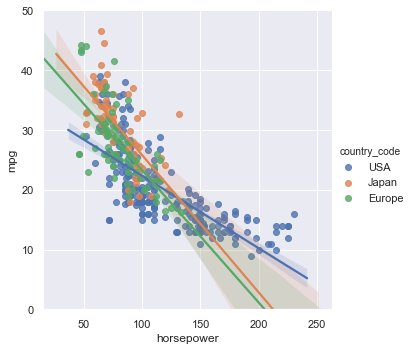

In [48]:
var = 'horsepower'
plot = sns.lmplot(var,'mpg',data=df,hue='country_code')
plot.set(ylim = (0,50))

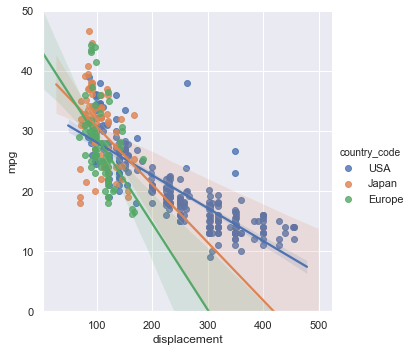

In [49]:
var = 'displacement'
plot = sns.lmplot(var,'mpg',data=df,hue='country_code')
plot.set(ylim = (0,50))

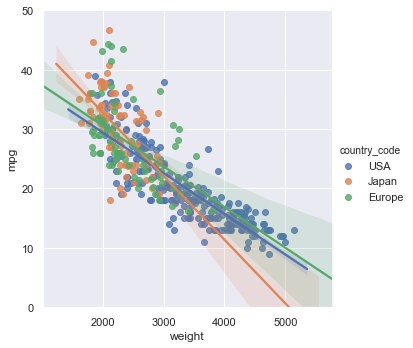

In [50]:
var = 'weight'
plot = sns.lmplot(var,'mpg',data=df,hue='country_code')
plot.set(ylim = (0,50))

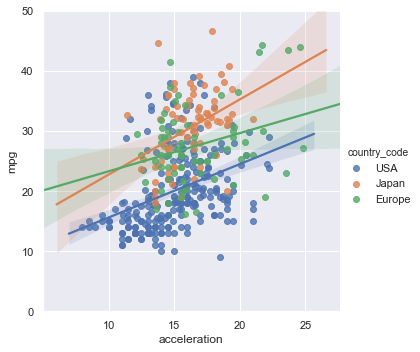

In [51]:
var = 'acceleration'
plot = sns.lmplot(var,'mpg',data=df,hue='country_code')
plot.set(ylim = (0,50))

In [52]:
df['Power_to_weight'] = ((df.horsepower*0.7457)/df.weight)

In [53]:
df.sort_values(by='Power_to_weight',ascending=False ).head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,country_code,Company_Name,Power_to_weight
car name,,,,,,,,,,,
buick estate wagon (sw),14.0,8,455.0,225.0,3086,10.0,70,1,USA,subaru,0.054369
pontiac grand prix,16.0,8,400.0,230.0,4278,9.5,73,1,USA,subaru,0.040091
pontiac catalina,14.0,8,455.0,225.0,4425,10.0,70,1,USA,subaru,0.037917
bmw 2002,26.0,4,121.0,113.0,2234,12.5,70,2,Europe,subaru,0.037719
chevrolet impala,14.0,8,454.0,220.0,4354,9.0,70,1,USA,subaru,0.037679


Our journey so far:

So far, we have a looked at our data using various pandas methods and visualized it using seaborn package. We looked at

MPGs relation with discrete variables

MPG distribution over given years if manufacturing

MPG distribution by country of origin

MPG distribution by number of cylinders

MPGs relation to other continuous variables:

    Pair wise scatter plot of all variables in data. ### Correlation

    We looked at the correlation heat map of all columns in our data


# Lets look at some regression models:

Now that we know what our data looks like, lets use some machine learning models to predict the value of MPG given the values of the factors. We will use pythons scikit learn to train test and tune various regression models on our data and compare the results. We shall use the following regression models:-

Linear Regression

GBM Regression

In [54]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,country_code,Company_Name,Power_to_weight
car name,,,,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,USA,subaru,0.027666
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,USA,subaru,0.033317
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,USA,subaru,0.032554
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,USA,subaru,0.032582
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,USA,subaru,0.030269


In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [56]:
factors = ['cylinders','displacement','horsepower','acceleration','weight','origin','model year']
X = pd.DataFrame(df[factors].copy())
y = df['mpg'].copy()

# ''Standardization''

In [57]:
X = StandardScaler().fit_transform(X)

# Train_Test_Split

In [58]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.33,random_state=324)
X_train.shape[0] == y_train.shape[0]

True

# Model Implementation

In [59]:
regressor = LinearRegression()

In [60]:
regressor.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [61]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
y_predicted = regressor.predict(X_test)

In [63]:
rmse = sqrt(mean_squared_error(y_true=y_test,y_pred=y_predicted))
rmse

3.486729614901562

In [64]:
gb_regressor = GradientBoostingRegressor(n_estimators=4000)
gb_regressor.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=4000,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [65]:
gb_regressor.get_params()

{'alpha': 0.9,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 4000,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [66]:
y_predicted_gbr = gb_regressor.predict(X_test)

In [67]:
rmse_bgr = sqrt(mean_squared_error(y_true=y_test,y_pred=y_predicted_gbr))
rmse_bgr

2.7323228863017315

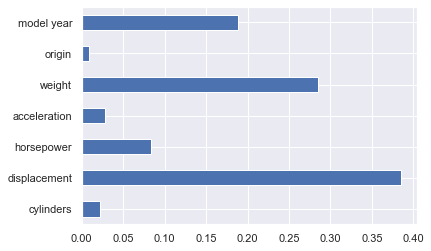

In [68]:
fi= pd.Series(gb_regressor.feature_importances_,index=factors)
fi.plot.barh()

Good, so our initial models work well, but these metrics were performed on test set and cannot be used for tuning the model, as that will cause bleeding of test data into training data, hence, we will use K-Fold to create Cross Validation sets and use grid search to tune the model.

# Hyperparameter Tuning



# 'Cross Validation-K Fold'

# 'GridSearchCV'

# '''Principle Component Analysis'''

In [69]:
from sklearn.decomposition import PCA

In [70]:
pca = PCA(n_components=2)

In [71]:
pca.fit(df[factors])

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [72]:
pca.explained_variance_ratio_

array([0.99756151, 0.0020628 ])

In [73]:
pca1 = pca.components_[0]
pca2 = pca.components_[1]

In [74]:
transformed_data = pca.transform(df[factors])

In [75]:
pc1 = transformed_data[:,0]
pc2 = transformed_data[:,1]


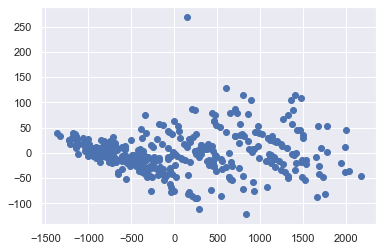

In [76]:
plt.scatter(pc1,pc2)

In [77]:
c = pca.inverse_transform(transformed_data[(transformed_data[:,0]>0 )& (transformed_data[:,1]>250)])

In [78]:
factors

['cylinders',
 'displacement',
 'horsepower',
 'acceleration',
 'weight',
 'origin',
 'model year']

In [79]:
c

array([[9.32016159e+00, 4.65727261e+02, 1.90441442e+02, 5.95699243e+00,
        3.08611199e+03, 6.23550659e-01, 6.93571097e+01]])

In [80]:
df[(df['model year'] == 70 )&( df.displacement>400)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,country_code,Company_Name,Power_to_weight
car name,,,,,,,,,,,
ford galaxie 500,15.0,8,429.0,198.0,4341,10.0,70,1,USA,subaru,0.034013
chevrolet impala,14.0,8,454.0,220.0,4354,9.0,70,1,USA,subaru,0.037679
plymouth fury iii,14.0,8,440.0,215.0,4312,8.5,70,1,USA,subaru,0.037181
pontiac catalina,14.0,8,455.0,225.0,4425,10.0,70,1,USA,subaru,0.037917
buick estate wagon (sw),14.0,8,455.0,225.0,3086,10.0,70,1,USA,subaru,0.054369


Now we use K-fold to create a new K-fold object called 'cv_sets' that contains index values for training and cross validation and use these sets in GridSearchCV to tune our model so that it does not over fit or under fit the data
We will also define a dictionary called 'params' with the hyper-parameters we want to tune
Lastly we define 'grid' which is a GridSearchCV object which we will provide the parameters to tune and the K folds of data created by using the Kfold in sklearn.model_selection

In [81]:
cv_sets = KFold(n_splits=10, shuffle= True,random_state=100)
params = {'n_estimators' : list(range(40,61)),
         'max_depth' : list(range(1,10)),
         'learning_rate' : [0.1,0.2,0.3] }
grid = GridSearchCV(gb_regressor, params,cv=cv_sets,n_jobs=4)

In [83]:
grid = grid.fit(X_train, y_train)

C:\Users\Sony\Anaconda3\New folder\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [84]:
grid.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.3, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=41,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [85]:
gb_regressor_t = grid.best_estimator_

In [86]:
gb_regressor_t.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.3, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=41,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [87]:
y_predicted_gbr_t = gb_regressor_t.predict(X_test)

In [88]:
rmse = sqrt(mean_squared_error(y_true=y_test,y_pred=y_predicted_gbr_t))
rmse

2.6886568635052357

Gradient Boosting Model is giving minimum error.Hence it is the best model.


# Saving the predicted values in csv file

In [89]:
y_predicted_gbr_t = pd.DataFrame(y_predicted_gbr_t, columns=['y_pred']).to_csv('Auto-Mpg.csv')

# Saving the best Model as a pickle in a file

Gradient Boosting Model is giving minimum error.Hence it is the best model

In [91]:
from sklearn.externals import joblib

In [92]:
joblib.dump(grid,'Auto-Mpg.pkl')

['Auto-Mpg.pkl']